In [1]:
# HCASE Experiments Reduced Altered tSNE KNN
#
# Author: Gergely Zahoranszky-Kohalmi, PhD
#
# Email: gergely.zahoranszky-kohalmi@nih.gov
#
# Organization: National Center for Advancing Translational Sciences (NCATS/NIH)
#


In [2]:
import pandas as pd

import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import seaborn as sns

import math

import rdkit
from rdkit import Chem

import scaffold_keys as sk
import knn
from knn import get_mol, get_fingerprint, get_Tanimoto, compute_sim



In [3]:
# Configuration


# We use previously computed scaffold keys for the reduced set of reference scaffolds, here: ChEMBL scaffolds.
fname_ref_scaffolds = '../data/red_hc_space.tab'


# We utilize previously selected 5 drug molecules and their KNNs (k=5)
fname_drugs_knns = '../data/rnd_5_app_drugs_drugbank_knn_5.tab'

# We utilize the t-SNE embedding of reduced set of reference scaffolds, here: ChEMBL
fname_chembl_scaffolds_tsne_embedding = '../data/si_reduced_altered_tsne_embedding_cp_scaffolds.tab'





fname_out_knn_drugs_alt_tsne_emb_coordinates = '../data/si_reduced_altered_tsne_knn_coords_drugs.tab'

fname_out_altered_tsne_knn_plot = '../plots/tsne/si_reduced_altered_tsne_knn.png'


# t-SNE parameters

metric = 'jaccard'
perplexity_values = [5, 10, 20, 30, 40, 50]
learning_rate = 200.0
n_iter = 1000
n_jobs = 4



In [4]:
# Import datasets

df_knn = pd.read_csv(fname_drugs_knns, sep ='\t')

df_ref_bms = pd.read_csv(fname_ref_scaffolds, sep ='\t')

df_ref_tsne_emb = pd.read_csv(fname_chembl_scaffolds_tsne_embedding, sep ='\t')

In [5]:
# Clean-up datasets



In [6]:
# Functions

def separate_query_from_target_mols (df_knn):
    df_target = df_knn[['knn_target_id', 'knn_target_structure', 'knn_color', 'data_label']].copy()
    df_target['knn_type'] = 'nn'
    df_target = df_target.rename(columns = {
        'knn_target_id': 'id',
        'knn_target_structure': 'smiles'
    #    'knn_color': 'color'
    })

    df_query = df_knn[['knn_query_id', 'knn_query_structure', 'knn_color', 'data_label']].copy()
    df_query['knn_type'] = 'parent'
    df_query = df_query.rename(columns = {
        'knn_query_id': 'id',
        'knn_query_structure': 'smiles'
    #    'knn_color': 'color'
    })

    df_query = df_query.groupby(['id'], as_index = False).agg({
        'smiles': 'first',
         'knn_color': 'first',
         'knn_type': 'first',
         'data_label': 'first'
    })

    df_query = df_query.reset_index(drop = True)

    df_knn = df_query.append(df_target, ignore_index = True)

    return (df_knn)


def generate_bms (df):
    df['bms'] = df.apply (lambda x: sk.smiles2bmscaffold (x['smiles']), axis = 1)
    
    return (df)



def generate_scaffold_keys (df):
    df['sk'] = df.apply (lambda x: sk.smiles2scaffoldkey (x['bms'], trailing_inchikey=True), axis = 1)
    
    return (df)



def closest_scaffold (sk_struct, df_space):
    df = df_space
    df['sk_struct'] = sk_struct
    df['sk_distance'] = df.apply (lambda x: sk.sk_distance (x['sk_struct'], x['scaffold_key']), axis = 1)
    df = df.sort_values (['sk_distance'])
    closest_scaffold_order = df['scaffold_id'].values[0]
    
    return (closest_scaffold_order)


###


def panel_plot_multi (subfig, df_plot, subfig_title):
    #df = df [df[df['hc_order'] == hc_order]
    #df_other = df[df['knn_type'] == 'other']
    
    df = df_plot.copy()
    print (df)
 
    df_1 = df[df['knn_color'] == 1]
    df_1_parent = df_1[df_1['knn_type'] == 'parent']
    df_1_nn = df_1[df_1['knn_type'] == 'nn']

    #print (df.head)
    #print (df_knn.head)
    #df_1_nn = df_1_nn.drop(columns = ['knn_color'])
    #df_1_nn = df_1_nn.merge(df_knn, left_on = id_col, right_on = 'knn_target_id', how = 'inner')



    df_2 = df[df['knn_color'] == 2]
    df_2_parent = df_2[df_2['knn_type'] == 'parent']
    df_2_nn = df_2[df_2['knn_type'] == 'nn']

    #df_2_nn = df_2_nn.drop(columns = ['knn_color'])
    #df_2_nn = df_2_nn.merge(df_knn, left_on = id_col, right_on = 'knn_target_id', how = 'inner')



    df_3 = df[df['knn_color'] == 3]
    df_3_parent = df_3[df_3['knn_type'] == 'parent']
    df_3_nn = df_3[df_3['knn_type'] == 'nn']

    #df_3_nn = df_3_nn.drop(columns = ['knn_color'])
    #df_3_nn = df_3_nn.merge(df_knn, left_on = id_col, right_on = 'knn_target_id', how = 'inner')


    df_4 = df[df['knn_color'] == 4]
    df_4_parent = df_4[df_4['knn_type'] == 'parent']
    df_4_nn = df_4[df_4['knn_type'] == 'nn']

    #df_4_nn = df_4_nn.drop(columns = ['knn_color'])
    #df_4_nn = df_4_nn.merge(df_knn, left_on = id_col, right_on = 'knn_target_id', how = 'inner')


    df_5 = df[df['knn_color'] == 5]
    df_5_parent = df_5[df_5['knn_type'] == 'parent']
    df_5_nn = df_5[df_5['knn_type'] == 'nn']

    #df_5_nn = df_5_nn.drop(columns = ['knn_color'])
    #df_5_nn = df_5_nn.merge(df_knn, left_on = id_col, right_on = 'knn_target_id', how = 'inner')



    subfig.scatter(df_1_parent['Dim_1'].values, df_1_parent['Dim_2'].values, c = 'blue', alpha = 0.7, marker = 'x', s = 200)
    subfig.scatter(df_1_nn['Dim_1'].values, df_1_nn['Dim_2'].values, c = 'blue', alpha = 0.7, marker = '+', s = 100)

    for i, txt in enumerate(list(df_1_nn['data_label'])):
        subfig.annotate('  ' + txt, ((df_1_nn['Dim_1'].values[i], df_1_nn['Dim_2'].values[i])))

    subfig.scatter(df_2_parent['Dim_1'].values, df_2_parent['Dim_2'].values, c = 'green', alpha = 0.7, marker = 'x', s = 200)
    subfig.scatter(df_2_nn['Dim_1'].values, df_2_nn['Dim_2'].values, c = 'green', alpha = 0.7, marker = '+', s = 100)

    for i, txt in enumerate(list(df_2_nn['data_label'])):
        subfig.annotate('  ' + txt, ((df_2_nn['Dim_1'].values[i], df_2_nn['Dim_2'].values[i])))



    subfig.scatter(df_3_parent['Dim_1'].values, df_3_parent['Dim_2'].values, c = 'purple', alpha = 0.7, marker = 'x', s = 200)
    subfig.scatter(df_3_nn['Dim_1'].values, df_3_nn['Dim_2'].values, c = 'purple', alpha = 0.7, marker = '+', s = 100)

    for i, txt in enumerate(list(df_3_nn['data_label'])):
        subfig.annotate('  ' + txt, ((df_3_nn['Dim_1'].values[i], df_3_nn['Dim_2'].values[i])))



    subfig.scatter(df_4_parent['Dim_1'].values, df_4_parent['Dim_2'].values, c = 'orangered', alpha = 0.7, marker = 'x', s = 200)
    subfig.scatter(df_4_nn['Dim_1'].values, df_4_nn['Dim_2'].values, c = 'orangered', alpha = 0.7, marker = '+', s = 100)


    for i, txt in enumerate(list(df_4_nn['data_label'])):
        subfig.annotate('  ' + txt, ((df_4_nn['Dim_1'].values[i], df_4_nn['Dim_2'].values[i])))



    subfig.scatter(df_5_parent['Dim_1'].values, df_5_parent['Dim_2'].values, c = 'aqua', alpha = 0.7, marker = 'x', s = 200)
    subfig.scatter(df_5_nn['Dim_1'].values, df_5_nn['Dim_2'].values, c = 'aqua', alpha = 0.7, marker = '+', s = 100)

    for i, txt in enumerate(list(df_5_nn['data_label'])):
        subfig.annotate('  ' + txt, ((df_5_nn['Dim_1'].values[i], df_5_nn['Dim_2'].values[i])))

    subfig.set_title (subfig_label, fontsize=24)
    subfig.set_xlabel ('Dim 1', fontsize=20)
    subfig.set_ylabel ('Dim 2', fontsize=20)
    
    
    










In [7]:
# Workflow for Altered tSNE KNN analysis



df_knn = separate_query_from_target_mols (df_knn)


df_knn = generate_bms(df_knn)

df_knn = generate_scaffold_keys (df_knn)

print (df_ref_bms.head)

df_knn['closest_scaffold_id'] = df_knn.apply(lambda x: closest_scaffold(x['sk'], df_ref_bms), axis = 1)

print (df_knn.head)

df_all = df_knn.merge (df_ref_tsne_emb, left_on = 'closest_scaffold_id', right_on = 'id', how = 'inner')
print (df_all.head)

df_all.to_csv (fname_out_knn_drugs_alt_tsne_emb_coordinates, sep = '\t', index = False)




[13:42:49] WARNING: Omitted undefined stereo
[13:42:49] WARNING: Omitted undefined stereo
[13:42:49] WARNING: Omitted undefined stereo
[13:42:49] WARNING: Omitted undefined stereo
[13:42:49] WARNING: Omitted undefined stereo
[13:42:49] WARNING: Omitted undefined stereo
[13:42:49] WARNING: Omitted undefined stereo
[13:42:49] WARNING: Omitted undefined stereo


<bound method NDFrame.head of                                                structure  order  \
0                                                C=C1CC1      1   
1                                                  C1CN1      2   
2                                             C1C[NH2+]1      3   
3                                                  C1CS1      4   
4                                                 C1=NC1      5   
...                                                  ...    ...   
50114  O=C1CCSSC[C@@H]2NC(=O)[C@@H]3CSSC[C@@H](C(=O)N...  50115   
50115  O=C(NCC(=O)N1Cc2ccccc2C[C@H]1C(=O)N1CC2CCCCC2[...  50116   
50116  S=P(N/N=C/c1ccc(OP2(Oc3ccc(/C=N/NP(=S)(Oc4cccc...  50117   
50117  O=C(CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)...  50118   
50118  O=C(CNC(=O)[C@@H]1C2CCCCC2CN1C(=O)[C@@H]1Cc2cc...  50119   

           scaffold_id                                       scaffold_key  
0          scaffold.10  3 0 0 1 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...  
1           s

Index(['id_x', 'smiles', 'knn_color', 'knn_type', 'data_label', 'bms', 'sk',
       'closest_scaffold_id', 'id_y', 'Dim_1', 'Dim_2', 'structure', 'fp_str',
       'fp_type', 'fp_radius', 'fp_length', 'perplexity'],
      dtype='object')
        id_x                                             smiles  knn_color  \
0    DB00006  CCC(C)C(NC(=O)C(CCC(O)=O)NC(=O)C(CCC(O)=O)NC(=...          2   
6    DB00849               CCC1(C(=O)NC(=O)N(C)C1=O)C2=CC=CC=C2          4   
12   DB01174                  CCC1(C(=O)NC(=O)NC1=O)C2=CC=CC=C2          4   
18   DB00977  C[C@]12CC[C@H]3[C@@H](CCC4=C3C=CC(=C4)O)[C@@H]...          3   
24   DB01357  COC1=CC2=C(C=C1)[C@H]3CC[C@@]4(C)[C@@H](CC[C@@...          3   
30   DB00783  C[C@]12CC[C@H]3[C@@H](CCC4=C3C=CC(=C4)O)[C@@H]...          3   
36   DB04573  C[C@]12CC[C@H]3[C@@H](CCC4=C3C=CC(=C4)O)[C@@H]...          3   
42   DB01362  CC(=O)N(CC(O)CO)C1=C(I)C(=C(I)C(=C1I)C(=O)NCC(...          5   
48   DB09135  CC(=O)N(CC(O)CO)C1=C(I)C(=C(I)C(=C1I)C(=O)NCCO.

<Figure size 640x480 with 0 Axes>

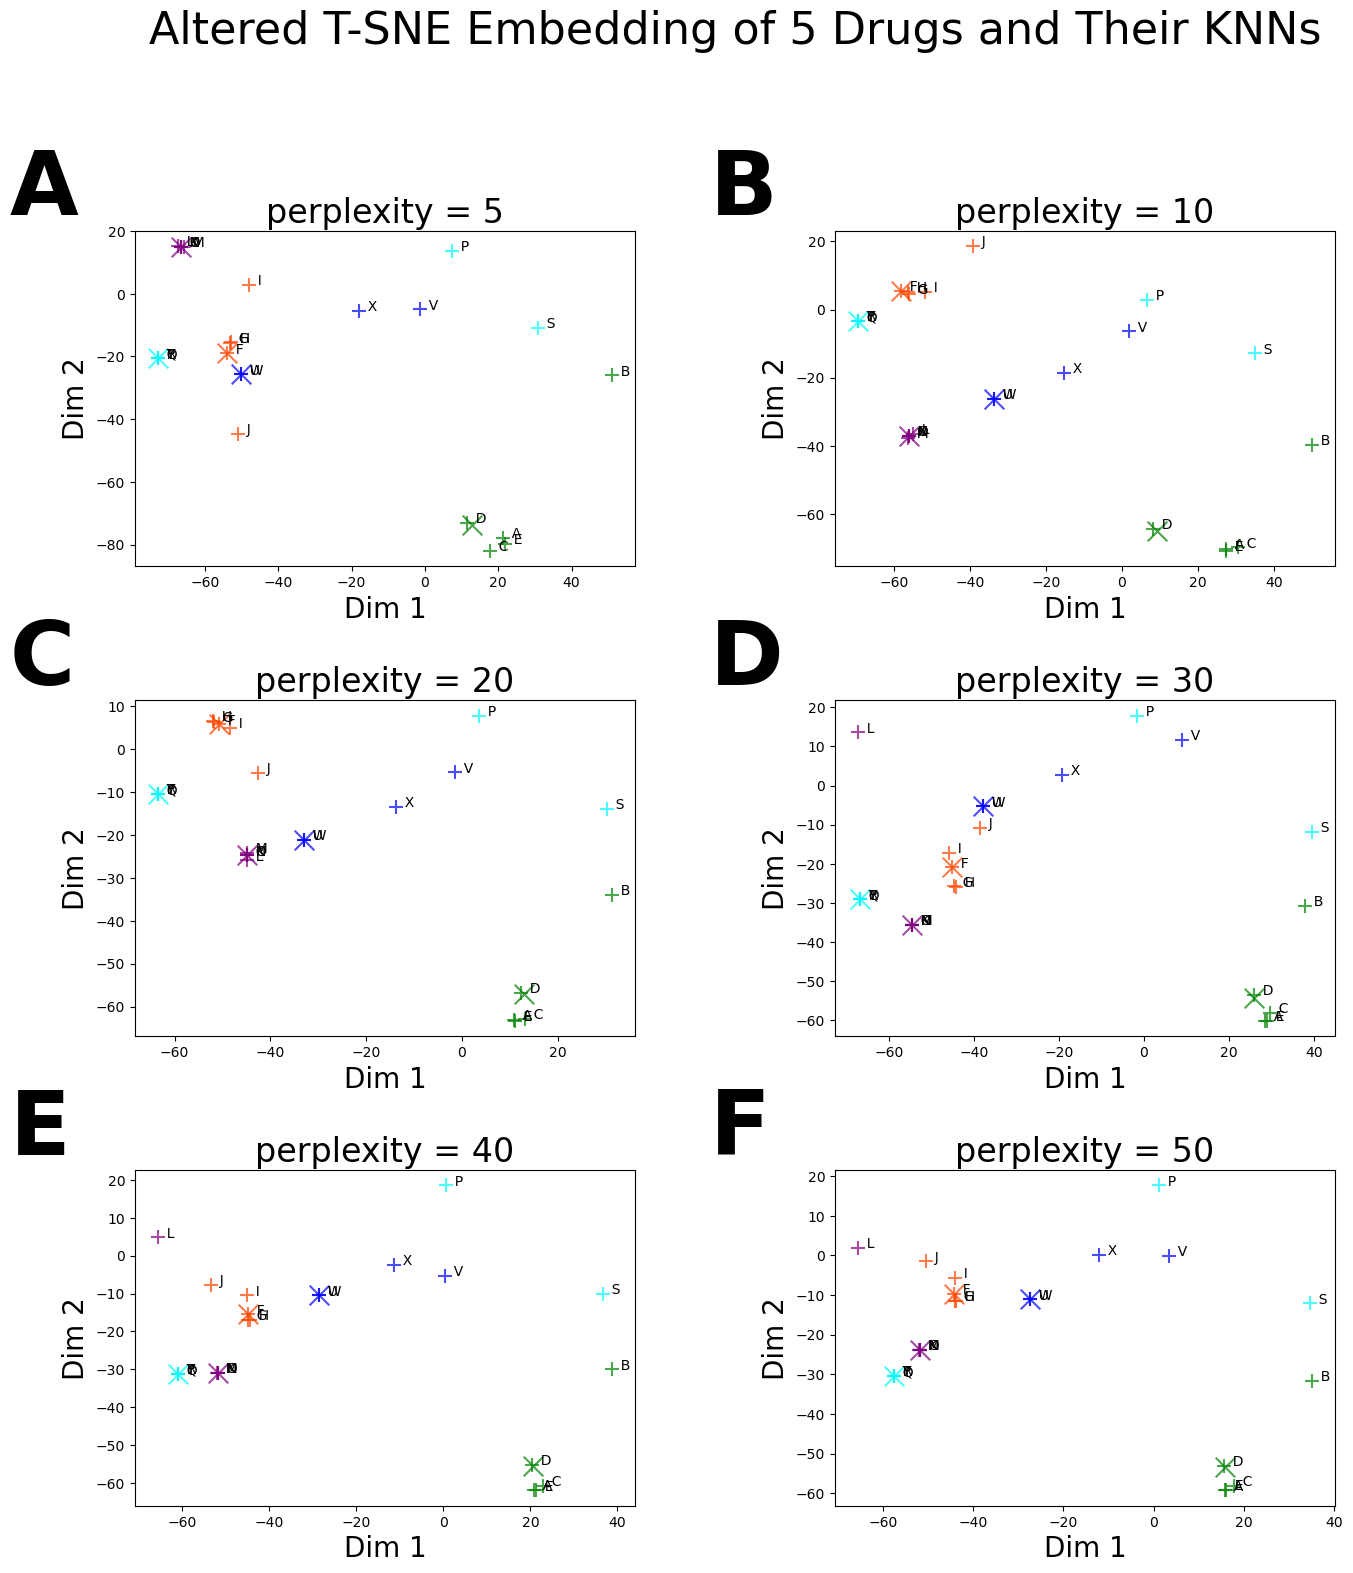

In [8]:
# Plotting KNN results



fig = plt.figure()

fig, subfigures = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 17))



for i in range(len(perplexity_values)):
    perplexity_val = perplexity_values[i]
    df_plot = df_all[df_all['perplexity'] == perplexity_val].copy()
    
    print (df_plot.columns)
    
    panel_x = int (math.floor(float(i) / 2.0))
    panel_y = i % 2

    
    subfig_label = 'perplexity = ' + str(perplexity_val)
    
    panel_plot_multi (subfigures[panel_x][panel_y], df_plot, subfig_label)

    
fig.suptitle('Altered T-SNE Embedding of 5 Drugs and Their KNNs', fontsize = 32)

subfigures[0][0].text(-0.25, 1.25, "A", transform=subfigures[0][0].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[0][1].text(-0.25, 1.25, "B", transform=subfigures[0][1].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[1][0].text(-0.25, 1.25, "C", transform=subfigures[1][0].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[1][1].text(-0.25, 1.25, "D", transform=subfigures[1][1].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[2][0].text(-0.25, 1.25, "E", transform=subfigures[2][0].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[2][1].text(-0.25, 1.25, "F", transform=subfigures[2][1].transAxes,
            fontsize=64, fontweight='bold', va='top')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.85,
                    wspace=0.4,
                    hspace=0.4)

plt.savefig (fname_out_altered_tsne_knn_plot, dpi=300)

plt.show()






In [9]:
# References


# Ref: https://github.com/matplotlib/matplotlib/issues/3466/
# Ref: https://iwatobipen.wordpress.com/2017/11/03/draw-high-quality-molecular-image-in-rdkit-rdkit/
# Ref: https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html
# Ref: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# Ref: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
# Ref: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html
# Ref: https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers
# Ref: https://matplotlib.org/3.1.1/gallery/shapes_and_collections/scatter.html
# Ref: https://matplotlib.org/3.1.1/tutorials/colors/colors.html
# Ref: https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
# Ref: https://python-graph-gallery.com/106-seaborn-style-on-matplotlib-plot/
# Ref: https://python-graph-gallery.com/122-multiple-lines-chart/
# Ref: https://python-graph-gallery.com/125-small-multiples-for-line-chart/
# Ref: https://seaborn.pydata.org/examples/many_facets.html
# Ref: https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point
# Ref: https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size
# Ref: https://stackoverflow.com/questions/17682216/scatter-plot-and-color-mapping-in-python
# Ref: https://stackoverflow.com/questions/31686530/matplotlib-generate-a-new-graph-in-a-new-window-for-subsequent-program-runs/31686783
# Ref: https://stackoverflow.com/questions/39870642/matplotlib-how-to-plot-a-high-resolution-graph
# Ref: https://www.rdkit.org/docs/GettingStartedInPython.html
# Ref: https://www.rdkit.org/docs/source/rdkit.Chem.Draw.html
# Ref: https://www.geeksforgeeks.org/how-to-create-multiple-subplots-in-matplotlib-in-python/
# Ref: https://stackoverflow.com/questions/44970881/matplotlib-multiple-scatter-subplots-with-shared-colour-bar
# Ref: https://stackoverflow.com/questions/14770735/how-do-i-change-the-figure-size-with-subplots#:~:text=To%20change%20figure%20size%20of,10))%20when%20creating%20subplots.&text=For%20plotting%20subplots%20in%20a,numpy%20array%20(2%20dimensional).
# Ref: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_title.html
# Ref: https://stackoverflow.com/questions/65901634/matplotlib-figure-supxlabel-does-not-work
# Ref: https://www.mathworks.com/help/matlab/ref/xlabel.html
# Ref: https://stackoverflow.com/questions/6963035/how-to-set-common-axes-labels-for-subplots
# Ref: https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size
# Ref: https://stackoverflow.com/questions/10035446/how-can-i-make-a-blank-subplot-in-matplotlib
# Ref: https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/
# Ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html



